# House Price Prediction Project 
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training
* Choose best model

# About 
This dataset offers a diverse collection of features, including square footage, bedrooms, bathrooms, neighborhood types, and the year of construction. Immerse yourself in the challenge of predicting house prices and enhance your skills in regression analysis.

## 1) Problem statement.

* The real estate market is highly dynamic, with prices fluctuating due to numerous factors such as location, amenities, property size, and economic conditions. For potential buyers, sellers, and real estate professionals, accurately predicting house prices is crucial for making informed decisions. Traditional methods of price estimation often rely on manual assessments and comparisons, which can be time-consuming and subject to human error.


**In this project we are going to use the data given to build a Regression model:**

* This model is to get the price of house based on given dataset
* This can be used to Recommend a suitable profile for the applicants for whom want to buy or sell a house, output should be price of house based on the certain criteria which influences the decision.

## 2) Data Collection.
* The Dataset is part of House Price Prediction
* The data consists of 50000 Rows and 6 Columns




### Importing data and required packages

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [7]:
df=pd.read_csv('bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [8]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [9]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [10]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Impute the missing values 

In [11]:
from sklearn.impute import KNNImputer,SimpleImputer

df1=df.dropna()

In [12]:
df1.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7496 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     7496 non-null   object 
 1   availability  7496 non-null   object 
 2   location      7496 non-null   object 
 3   size          7496 non-null   object 
 4   society       7496 non-null   object 
 5   total_sqft    7496 non-null   object 
 6   bath          7496 non-null   float64
 7   balcony       7496 non-null   float64
 8   price         7496 non-null   float64
dtypes: float64(3), object(6)
memory usage: 585.6+ KB


## Exploring Data

In [14]:
#define numerical and caetgorical data1
numerical_features=[feature for feature in df.columns if df[feature].dtype !='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype =='O']
print(f"Numerical features are:{numerical_features} and len is {len(numerical_features)}")
print(f"Categorical features are:{categorical_features} and len is {len(categorical_features)}")





Numerical features are:['bath', 'balcony', 'price'] and len is 3
Categorical features are:['area_type', 'availability', 'location', 'size', 'society', 'total_sqft'] and len is 6


In [15]:
df1['area_type']

0        Super built-up  Area
1                  Plot  Area
3        Super built-up  Area
5        Super built-up  Area
11                 Plot  Area
                 ...         
13313    Super built-up  Area
13314    Super built-up  Area
13315          Built-up  Area
13317          Built-up  Area
13318    Super built-up  Area
Name: area_type, Length: 7496, dtype: object

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
X=df1.drop(['price'],axis=1)
y=df1['price']
one_hot_features=['area_type', 'availability', 'location', 'size', 'society','total_sqft']

one_hot=LabelEncoder()


df1['area_type']=one_hot.fit_transform(df1['area_type'])
df1['availability']=one_hot.fit_transform(df1['availability'])
df1['location']=one_hot.fit_transform(df1['location'])
df1['size']=one_hot.fit_transform(df1['size'])
df1['society']=one_hot.fit_transform(df1['society'])
df1['total_sqft']=one_hot.fit_transform(df1['total_sqft'])


df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,3,35,210,3,443,63,2.0,1.0,39.07
1,2,73,149,8,2353,1128,5.0,3.0,120.00
3,3,73,387,5,2109,551,3.0,1.0,95.00
5,3,73,625,3,585,192,2.0,1.0,38.00
11,2,73,625,8,1566,1163,5.0,3.0,295.00
...,...,...,...,...,...,...,...,...,...
13313,3,73,590,5,100,378,2.0,1.0,57.00
13314,3,73,234,5,2148,725,3.0,3.0,112.00
13315,0,73,625,10,197,1262,4.0,0.0,231.00
13317,0,73,490,3,1168,159,2.0,1.0,60.00


In [19]:
X=df1.drop('price',axis=1)
y=df1['price']

In [20]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train

,area_type,availability,location,size,society,total_sqft,bath,balcony
12328,3,23,272,3,1167,183,2.0,1.0
11319,3,23,256,5,1169,883,3.0,2.0
2317,3,73,256,3,1679,45,2.0,1.0
732,3,24,464,5,1480,699,3.0,1.0
2881,0,73,624,3,1402,201,2.0,2.0
...,...,...,...,...,...,...,...,...
9286,3,73,583,5,1893,270,2.0,1.0
9340,3,35,625,3,1386,384,2.0,1.0
9628,3,73,143,3,2404,129,2.0,1.0
1491,3,73,628,0,169,1452,1.0,1.0


In [21]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [22]:
model.score(X_test,y_test)

0.8022104497678735

In [23]:
importances = model.feature_importances_
for i, j in enumerate(importances):
    print(f"Feature {X_train.columns[i]}: {j}")

Feature area_type: 0.012856457393822763
Feature availability: 0.02569662339740135
Feature location: 0.08424493026937395
Feature size: 0.23222882693157962
Feature society: 0.06531404581803556
Feature total_sqft: 0.380476880627977
Feature bath: 0.18557884397588986
Feature balcony: 0.013603391585919895


In [24]:
range(X_train.shape[1])
indices = np.argsort(importances)[::-1]
importances[indices]

array([0.38047688, 0.23222883, 0.18557884, 0.08424493, 0.06531405,
       0.02569662, 0.01360339, 0.01285646])

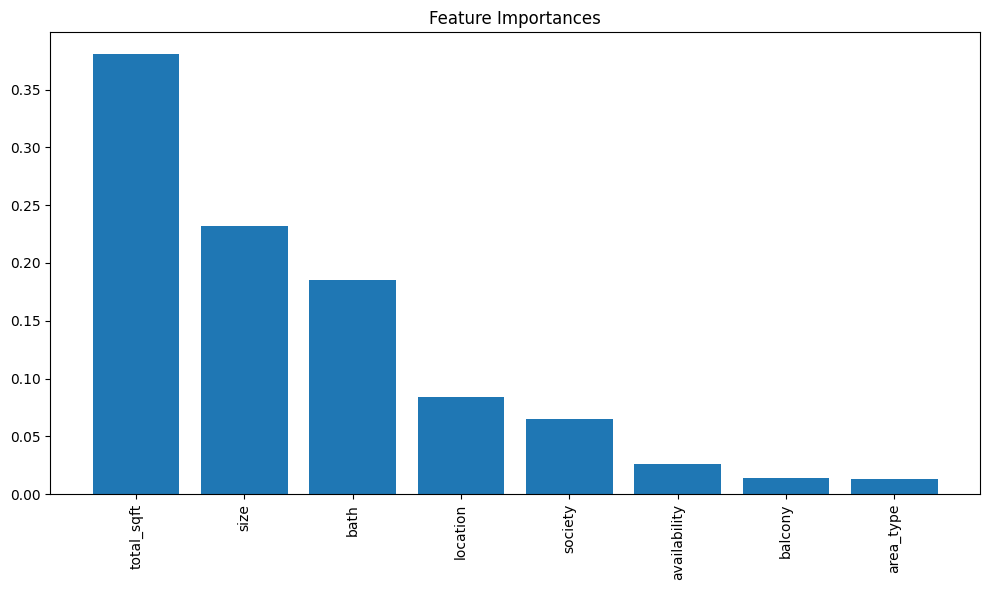

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
indices = np.argsort(importances)[::-1]
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(estimator=RandomForestRegressor()).fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
# X_test_selected = selector.transform(X_test)
selected_features = X_train.columns[(selector.get_support())]
print(selected_features)

Index(['size', 'total_sqft', 'bath'], dtype='object')


In [27]:
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

area_type
Super built-up  Area    65.990991
Built-up  Area          18.153153
Plot  Area              15.202703
Carpet  Area             0.653153
Name: proportion, dtype: float64
---------------------------
availability
Ready To Move    79.436937
18-Dec            2.304805
18-May            2.214715
18-Apr            2.034535
18-Aug            1.501502
                   ...    
15-Aug            0.007508
17-Jan            0.007508
16-Nov            0.007508
16-Jan            0.007508
14-Jul            0.007508
Name: proportion, Length: 81, dtype: float64
---------------------------
location
Whitefield                        4.054358
Sarjapur  Road                    2.995720
Electronic City                   2.267437
Kanakpura Road                    2.049703
Thanisandra                       1.756889
                                    ...   
Bapuji Layout                     0.007508
1st Stage Radha Krishna Layout    0.007508
BEML Layout 5th stage             0.007508
singapura para

In [28]:
df3=df.drop(['area_type','availability','society','balcony'],axis=1)
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [29]:
df3.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [30]:
df3.dropna(inplace=True)

In [31]:
df3['no_of_BHK']=df3['size'].apply(lambda x: int(x.split(' ')[0]) if pd.notna(x) else None)

In [32]:
df3

,location,size,total_sqft,bath,price,no_of_BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   no_of_BHK   13246 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 724.4+ KB


In [34]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
df3[~df3['total_sqft'].apply(is_float)].head(10)


,location,size,total_sqft,bath,price,no_of_BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [35]:
# token=
def convert_sqft_to_num(x):
    token=x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None
df3['total_sqft']=df3['total_sqft'].apply(convert_sqft_to_num)
df3

,location,size,total_sqft,bath,price,no_of_BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [36]:
# now we can get the price of per square feet
df3['price_per_sqft']=df3['price']*100000/(df3['total_sqft'])

In [37]:
df3

,location,size,total_sqft,bath,price,no_of_BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [38]:
# Dimensionality Reduction
location_count=df['location'].value_counts()

In [39]:
len(location_count[location_count>10])

241

In [40]:
len(location_count[location_count<=10])


1064

In [41]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13246 non-null  object 
 1   size            13246 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13246 non-null  float64
 4   price           13246 non-null  float64
 5   no_of_BHK       13246 non-null  int64  
 6   price_per_sqft  13200 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 827.9+ KB


Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [42]:
location_less_than_10=location_count[location_count<=10]
df3['location']=df['location'].apply(lambda x:"other" if x in location_less_than_10 else x)
location_less_than_10

location
Kalkere                           10
Gunjur Palya                      10
Dodsworth Layout                  10
BTM 1st Stage                     10
Sadashiva Nagar                   10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: count, Length: 1064, dtype: int64

In [43]:
df3['location']=df['location'].apply(lambda x:"other" if x in location_less_than_10 else x)
df3.head(15)

,location,size,total_sqft,bath,price,no_of_BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [44]:
df3['location'].nunique()

242

## Outliers removal
As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [45]:
df3[df3['total_sqft']/df3['no_of_BHK']<300]

,location,size,total_sqft,bath,price,no_of_BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [46]:
df3.shape

(13246, 7)

In [47]:
df3['total_sqft'].describe()

count    13200.000000
mean      1555.302783
std       1237.323445
min          1.000000
25%       1100.000000
50%       1275.000000
75%       1672.000000
max      52272.000000
Name: total_sqft, dtype: float64

In [48]:
df4=df3[~(df3['total_sqft']/df3['no_of_BHK']<300)]
df4.shape

(12502, 7)

## Outlier Removal Using Standard Deviation and Mean


In [49]:
df4.price_per_sqft.describe()


count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [50]:
df4.shape

(12502, 7)

Here we find that min price per sqft is 267 rs/sqft whereas max is 176470.588235, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [51]:
def remove_pps_outliers(df4):
    df_out=pd.DataFrame()
    for key,subdf in df4.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf['price_per_sqft']>(m-st)) & (subdf['price_per_sqft'] <=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df5=remove_pps_outliers(df4)
df5.shape
        

(10244, 7)

Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

In [52]:
def scatter_plot(df,location):
    bhk2=df[(df.location==location)& (df.no_of_BHK==2)]
    bhk3=df[(df.location==location)&(df.no_of_BHK==3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='red',label='3 BHK',s=50,marker='+')
    plt.xlabel("total square feet area")
    plt.ylabel("price (in lakhs)")
    plt.legend()    

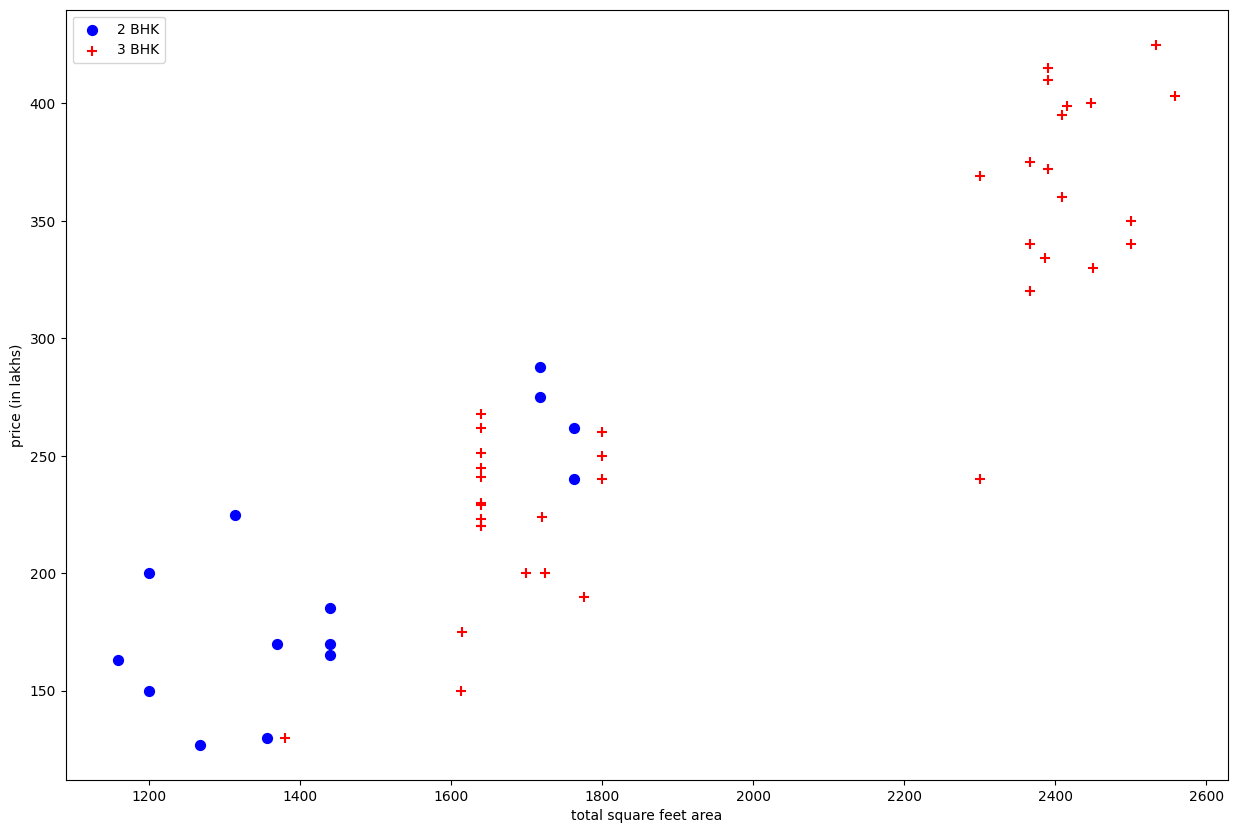

In [53]:
scatter_plot(df5,"Rajaji Nagar")

Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment


In [54]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('no_of_BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby("no_of_BHK"):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < stats['mean']].index.values)
    return df.drop(exclude_indices,axis='index')

df6=remove_bhk_outliers(df5)
df6

,location,size,total_sqft,bath,price,no_of_BHK,price_per_sqft
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2,4540.654699
...,...,...,...,...,...,...,...
10235,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10236,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10239,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10240,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


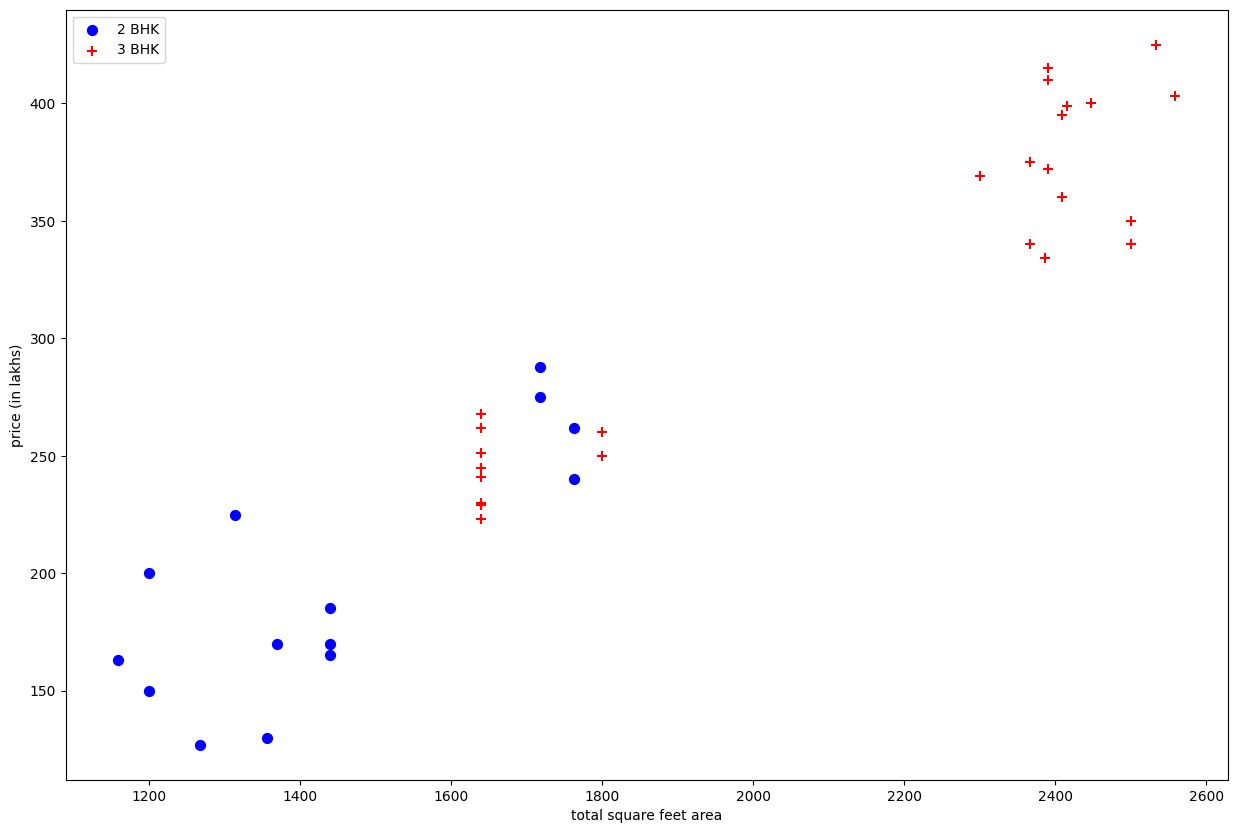

In [55]:
scatter_plot(df6,"Rajaji Nagar")

Now you can see outliers have been removed

### Outlier Removal Using Bathrooms Feature


In [56]:
df6.bath.nunique()

12

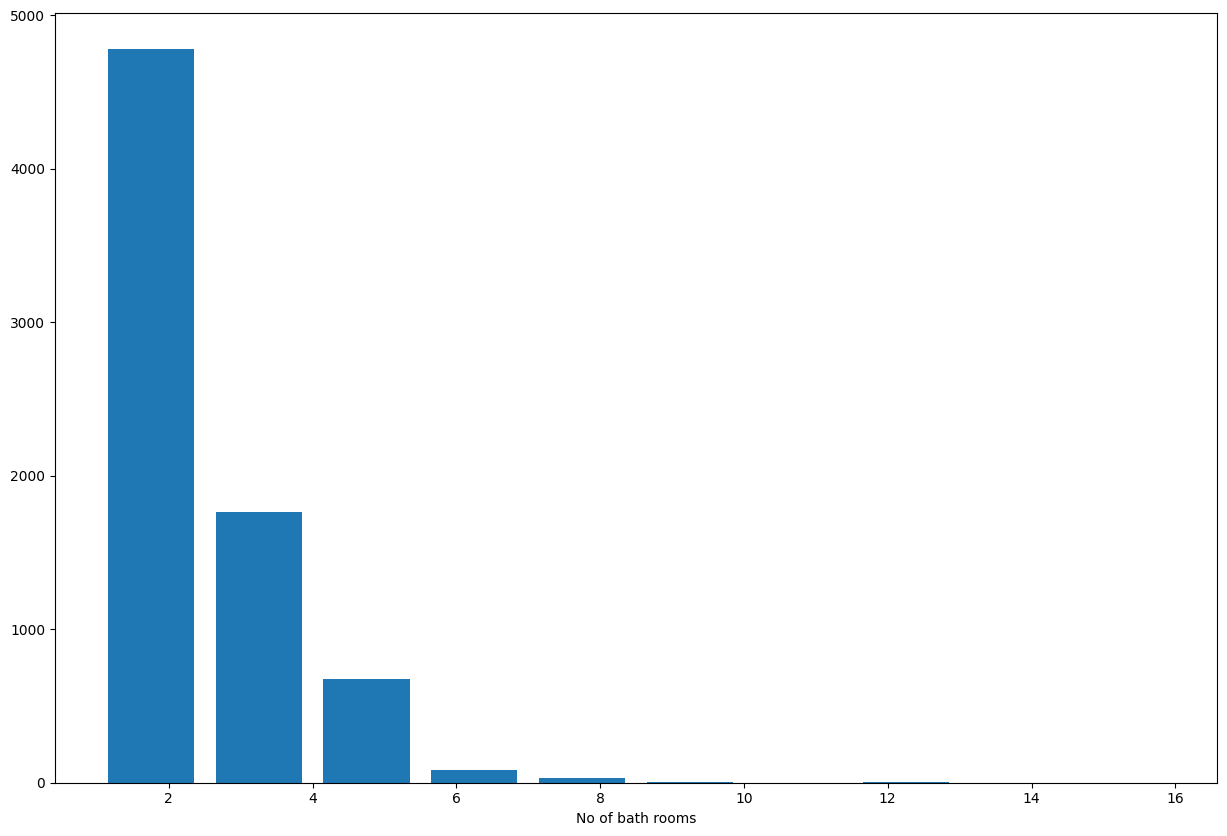

In [57]:
plt.hist(df6.bath,rwidth=0.8)
plt.xlabel("No of bath rooms")
plt.show()

In [58]:
df6[df6.bath>10]

,location,size,total_sqft,bath,price,no_of_BHK,price_per_sqft
5271,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8481,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8570,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9309,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9641,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


It is unusal to have 2 more bathrooms than number of bedrooms in a home

In [59]:
df6[df6.bath>df6.no_of_BHK+2]

,location,size,total_sqft,bath,price,no_of_BHK,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5232,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6702,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8405,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [60]:
df7=df6[df6.bath<df6.no_of_BHK+2]
df7

,location,size,total_sqft,bath,price,no_of_BHK,price_per_sqft
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2,4540.654699
...,...,...,...,...,...,...,...
10235,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10236,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10239,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10240,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


Now we can remove size and price_per_sqft columns from dataframe

In [61]:
df8=df7.drop(['size','price_per_sqft'],axis=1)
df8

,location,total_sqft,bath,price,no_of_BHK
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2
...,...,...,...,...,...
10235,other,1200.0,2.0,70.0,2
10236,other,1800.0,1.0,200.0,1
10239,other,1353.0,2.0,110.0,2
10240,other,812.0,1.0,26.0,1


## Use OneHotEncoder for location column

In [62]:
# from sklearn.preprocessing import OneHotEncoder
# one_hot=OneHotEncoder(sparse=False)

# location_encode=pd.DataFrame(one_hot.fit_transform(df8[['location']]))
# one_hot.get_feature_names(['location'])
# location_col=one_hot.get_feature_names_out(['location'])
# location_col
# location_encode.columns=location_col

In [63]:
dummies=pd.get_dummies(df8.location,dtype='int')
dummies.head(10)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
type(dummies)

pandas.core.frame.DataFrame

In [65]:
df9=pd.concat([df8,dummies.drop('other',axis='columns')],axis='columns')
df9

,location,total_sqft,bath,price,no_of_BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,other,1200.0,2.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,other,1800.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10239,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10240,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df9.bath.unique()

array([ 2.,  3.,  4.,  5.,  1.,  6.,  8.,  7.,  9., 16., 12., 13.])

In [67]:
df10=df9.drop('location',axis=1)
df10.isnull().sum()

total_sqft              0
bath                    0
price                   0
no_of_BHK               0
 Devarachikkanahalli    0
                       ..
Yelachenahalli          0
Yelahanka               0
Yelahanka New Town      0
Yelenahalli             0
Yeshwanthpur            0
Length: 245, dtype: int64

In [68]:
df10.shape

(7264, 245)

In [69]:
X=df10.drop('price',axis=1)
y=df10['price']


In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [71]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [72]:
lr.score(X_test,y_test)

0.8647928507271301

In [73]:
from numpy import mean
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def evaluate_reg(true, predicted):
    r2score=r2_score(true,predicted)
    meansquareerror=mean_squared_error(true,predicted)
    mean_absolute=mean_absolute_error(true,predicted)
    root_mean_Score=np.sqrt(meansquareerror)
    return r2score,mean_absolute,meansquareerror,root_mean_Score


In [74]:
# Create a function which can evaluate models and return a report
from sklearn.model_selection import train_test_split
def evaluate_models(X_train, X_test,y_train,y_test, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    # X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

    models_list = []
    r2Score = []
    auc= []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        r2score,meanabsoluteerror,meansquarederror,rootmeansquareerror=evaluate_reg(y_train ,y_train_pred)


        # Test set performance
        r2score_test,meanabsoluteerror_test,meansquarederror_test,rootmeansquareerror_test=evaluate_reg(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i]) ## Append to the list of models

        print('Model performance for Training set')
        print("- r2score: {:.4f}".format(r2score))
        print('- meanabsoluteerror: {:}'.format(meanabsoluteerror))
        print('- meansquarederror: {:}'.format(meansquarederror))
        print('- root meansquarederror: {:}'.format(rootmeansquareerror))

        print('-----------------------------------------------------------------')
        root_mean_square_error=[]
        print('Model performance for Test set')
        print('- r2score: {:.4f}'.format(r2score_test))
        r2Score.append(r2score_test) ## Append to the list of accuracy
        print('- meanabsoluteerror:{:}'.format(meanabsoluteerror_test))
        print('- meansquarederror: {:}'.format(meansquarederror_test))
        print('- meansquarederror: {:}'.format(rootmeansquareerror_test))
        root_mean_square_error.append(rootmeansquareerror_test)
        print('='*35)
        print('\n')

    report=pd.DataFrame(list(zip(models_list, r2Score,root_mean_square_error)), columns=['Model Name', 'r2Score',"root_mean_square_error"]).sort_values(by=['r2Score',"root_mean_square_error"], ascending=False)

    return report

In [82]:
X_test

,total_sqft,bath,no_of_BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1702,2300.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8583,650.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7644,800.0,1.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5028,1469.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3004,1935.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,1424.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2700,1243.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
339,1662.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6284,1800.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR 
from xgboost import XGBRegressor
from catboost import CatBoostRegressor


models={
  "Linear Regression":LinearRegression(),
  "KNeighborsRegressor":KNeighborsRegressor(),
  "RandomForestRegressor":RandomForestRegressor(),
  "GradientBoostingRegressor":GradientBoostingRegressor(),
  "DecisionTreeRegressor":DecisionTreeRegressor(),
  "support vector regressor":SVR(kernel='rbf'),
  "XGBRegressor":XGBRegressor(),
  "Cat boost regressor":CatBoostRegressor(verbose=0)
}


In [81]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [95]:
np.zeros(241)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [97]:
lr.predict([[2300.0,3,3,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.]])[0]

188.73492873094807

In [76]:
evaluate_models(X_train,X_test,y_train,y_test,models)

Linear Regression
Model performance for Training set
- r2score: 0.8503
- meanabsoluteerror: 17.06555060904078
- meansquarederror: 1182.7407482782114
- root meansquarederror: 34.39099807039934
-----------------------------------------------------------------
Model performance for Test set
- r2score: 0.8648
- meanabsoluteerror:17.874499077739582
- meansquarederror: 919.6640978377156
- meansquarederror: 30.325964087522685


KNeighborsRegressor
Model performance for Training set
- r2score: 0.7841
- meanabsoluteerror: 19.302414558595768
- meansquarederror: 1705.4166697647565
- root meansquarederror: 41.29669078467131
-----------------------------------------------------------------
Model performance for Test set
- r2score: 0.6518
- meanabsoluteerror:24.41448451479697
- meansquarederror: 2368.4285790502404
- meansquarederror: 48.66650366576831


RandomForestRegressor
Model performance for Training set
- r2score: 0.9589
- meanabsoluteerror: 8.240057476761905
- meansquarederror: 324.6954527575

,Model Name,r2Score,root_mean_square_error
0,Linear Regression,0.864793,28.248674


In [77]:
from sklearn.model_selection import RandomizedSearchCV

random_forest_params = {
    'n_estimators': [100, 200, 300],  # The number of trees in the for est
    'max_depth': [None, 3, 5, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # The minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # The minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # The number of features to consider when looking for the best split
}

cat_boost_params = {
    'iterations': [100, 200, 500],
    'learning_rate': [0.03, 0.1, 0.15],
    'depth': [4, 6, 10],
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [32, 64, 128],
    'loss_function': ['RMSE'],  # Choose depending on your problem
}
gradient_boosting_params = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages to be run
    'learning_rate': [0.1, 0.05, 0.01],  # Shrinks the contribution of each tree
    'max_depth': [3, 4, 5],  # Maximum depth of the individual regression estimators
    'min_samples_split': [2, 4, 6],  # The minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # The minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None]  # The number of features to consider when looking for the best split
}

xgboost_params = {
    'n_estimators': [100, 200, 300],  # The number of boosting stages to be run
    'learning_rate': [0.1, 0.05, 0.01],  # Shrinks the contribution of each tree
   'max_depth': [3, 4, 5],  # Maximum depth of the individual regression estimators
}


In [78]:
random_models=[
    ("Xgboost",XGBRegressor(),xgboost_params),
    ("catboost",CatBoostRegressor(),cat_boost_params)
]

In [79]:
from sklearn.preprocessing import StandardScaler


std=StandardScaler()
scaled_xtrain=std.fit_transform(X_train)
scaled_xtest=std.transform(X_test)

In [80]:
from sklearn.model_selection import GridSearchCV


model_params={}

for name,model,param in random_models:
    reg=GridSearchCV(estimator=model,param_grid=param,cv=5,n_jobs=-1,verbose=1)
    reg.fit(X_train,y_train)
    model_params[name]=reg.best_params_


model_params
    


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 243 candidates, totalling 1215 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    # "Random Forest Classifier": RandomForestRegressor(**model_param['randomforest']),
    "Catboost": CatBoostRegressor(**model_params['catboost']),
    "XGBregressor": XGBRegressor(**model_params['Xgboost'],n_jobs=-1)
}

tuned_report=evaluate_models(X_train,X_test,y_train,y_test,models=best_models)
tuned_report

0:	learn: 81.4658367	total: 2.32ms	remaining: 1.16s
1:	learn: 75.1804154	total: 4.46ms	remaining: 1.11s
2:	learn: 70.1399978	total: 5.93ms	remaining: 983ms
3:	learn: 65.7976519	total: 7.72ms	remaining: 957ms
4:	learn: 62.0741313	total: 9.19ms	remaining: 910ms
5:	learn: 59.1536856	total: 10.7ms	remaining: 878ms
6:	learn: 56.8599835	total: 12ms	remaining: 844ms
7:	learn: 55.0169597	total: 13.4ms	remaining: 824ms
8:	learn: 53.3175523	total: 14.7ms	remaining: 801ms
9:	learn: 51.9284515	total: 16ms	remaining: 785ms
10:	learn: 50.5836137	total: 17.4ms	remaining: 774ms
11:	learn: 49.4606028	total: 18.8ms	remaining: 766ms
12:	learn: 48.5760684	total: 20.2ms	remaining: 756ms
13:	learn: 47.6650655	total: 21.6ms	remaining: 748ms
14:	learn: 47.0620450	total: 23ms	remaining: 744ms
15:	learn: 46.3528473	total: 24.4ms	remaining: 739ms
16:	learn: 45.7288368	total: 25.7ms	remaining: 730ms
17:	learn: 45.2186222	total: 27ms	remaining: 724ms
18:	learn: 44.7338368	total: 28.3ms	remaining: 718ms
19:	learn: 

,Model Name,r2Score,root_mean_square_error
0,Catboost,0.878485,29.276492
